## 문제: 키 몸무게를 matrix inverse method와 gradient descent로 풀기 (in 파이썬)

### 1. matrix inverse

#### data

In [1]:
import os

file=open(os.path.join('data','ds_spark_heightweight.txt'))

In [2]:
import numpy as np
my=list()
for line in file:
    line=line.split()
    my.append([float(line[1]),float(line[2])])
my=np.array(my)

In [3]:
x=my[:,0]
y=my[:,1]

In [4]:
my.shape

(50, 2)

In [5]:
len(x)

50

In [6]:
x=np.array([x,np.ones(len(x))])
x=x.T

In [7]:
x, x.shape

(array([[65.78,  1.  ],
        [71.52,  1.  ],
        [69.4 ,  1.  ],
        [68.22,  1.  ],
        [67.79,  1.  ],
        [68.7 ,  1.  ],
        [69.8 ,  1.  ],
        [70.01,  1.  ],
        [67.9 ,  1.  ],
        [66.78,  1.  ],
        [66.49,  1.  ],
        [67.62,  1.  ],
        [68.3 ,  1.  ],
        [67.12,  1.  ],
        [68.28,  1.  ],
        [71.09,  1.  ],
        [66.46,  1.  ],
        [68.65,  1.  ],
        [71.23,  1.  ],
        [67.13,  1.  ],
        [67.83,  1.  ],
        [68.88,  1.  ],
        [63.48,  1.  ],
        [68.42,  1.  ],
        [67.63,  1.  ],
        [67.21,  1.  ],
        [70.84,  1.  ],
        [67.49,  1.  ],
        [66.53,  1.  ],
        [65.44,  1.  ],
        [69.52,  1.  ],
        [65.81,  1.  ],
        [67.82,  1.  ],
        [70.6 ,  1.  ],
        [71.8 ,  1.  ],
        [69.21,  1.  ],
        [66.8 ,  1.  ],
        [67.66,  1.  ],
        [67.81,  1.  ],
        [64.05,  1.  ],
        [68.57,  1.  ],
        [65.18, 

In [8]:
y

array([112.99, 136.49, 153.03, 142.34, 144.3 , 123.3 , 141.49, 136.46,
       112.37, 120.67, 127.45, 114.14, 125.61, 122.46, 116.09, 140.  ,
       129.5 , 142.97, 137.9 , 124.04, 141.28, 143.54,  97.9 , 129.5 ,
       141.85, 129.72, 142.42, 131.55, 108.33, 113.89, 103.3 , 120.75,
       125.79, 136.22, 140.1 , 128.75, 141.8 , 121.23, 131.35, 106.71,
       124.36, 124.86, 139.67, 137.37, 106.45, 128.76, 145.68, 116.82,
       143.62, 134.93])

#### w

In [9]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y)) #1이 뒤에있으니까 2번째가 w0이다

In [10]:
print("w1:{} w0:{}".format(w1,w0))

w1:4.18697047973501 w0:-156.09138987513143


#### yhat

In [11]:
yhat = w0*x[:,1] + w1*x[:,0]

#### MSE

In [12]:
np.sum(np.power(y-yhat, 2))/len(x) #'mean' squared error이므로 /len(x)을 한다.

105.6444144864452

#### 그래프

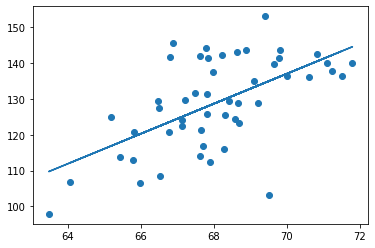

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],y)
plt.plot(x[:,0],yhat) #상수항을 제거해야한다. 상수항: 절편 구하기 위해 넣었던 것
plt.show()

### 2. ststsmodels과 비교

In [14]:
import statsmodels.api as sm
result = sm.OLS(y,x).fit() # 이 함수가 y,x 이런식으로 되어있어서 그 순서를 따라서 써야한다. (함수 API 확인)

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     25.97
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.81e-06
Time:                        18:19:02   Log-Likelihood:                -187.45
No. Observations:                  50   AIC:                             378.9
Df Residuals:                      48   BIC:                             382.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1870      0.822      5.096      0.000       2.535       5.839
const       -156.0914     55.933     -2.791      0.008    -268.552     -43.631
==============================================================================
Omnibus:                        1.591   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.792
Skew:                          -0.193   Prob(JB):                        0.673
Kurtosis:                       3.481   Cond. No.                     2.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
result.rsquared, result.rsquared_adj

(0.3510824732436808, 0.33756335810292415)

### 3. gradient

기울기가 매우 빠르게 변경되면, 오류 overflow가 나올 수 있다. alpha를 매우 작게 조정하면 된다.

#### 설정

In [17]:
x.shape, y.shape

((50, 2), (50,))

In [18]:
alpha = 0.0001 #alpha가 크면 최소화 지점을 지나칠 수 있다.
theta=np.array(np.ones([x.shape[1]]))

#### w

In [19]:
def gradientDescent(x,y,theta,alpha,numIterations):
    #alpha=0.01
    #theta=np.ones([x.shape[1]]) # 2 of(4,2)
    #i=0
    #numIterations=10000
    #oldCost=-np.inf
    #cost=np.inf
    for i in range(numIterations):
        #i+=1
        h=np.dot(x,theta)
        error=h-y
        #oldCost=cost
        cost=np.sum((h-y)**2)/len(x) #full MSE
        #cost=np.sum((h-y)**2)/(2*len(X)) #Half MSE
        #gradient=[np.sum(h-y)*2,np.sum((h-y)*x)*2]
        gradient=np.dot(x.T,error)*2/len(x) #w0,w1
        theta-=alpha*gradient
        if i%100==0:
            print("Iteration {0} | theta{1} Cost {2:.5f}".format(i,theta,cost))

    return theta

In [20]:
w1, w0=gradientDescent(x, y, theta, alpha, 10000) 

Iteration 0 | theta[1.81584329 1.01195792] Cost 3713.55551
Iteration 100 | theta[1.88004846 1.01069023] Cost 123.00794
Iteration 200 | theta[1.88008091 1.00848025] Cost 123.00745
Iteration 300 | theta[1.88011336 1.00627029] Cost 123.00696
Iteration 400 | theta[1.88014581 1.00406037] Cost 123.00647
Iteration 500 | theta[1.88017826 1.00185048] Cost 123.00598
Iteration 600 | theta[1.88021071 0.99964062] Cost 123.00550
Iteration 700 | theta[1.88024316 0.99743079] Cost 123.00501
Iteration 800 | theta[1.88027561 0.995221  ] Cost 123.00452
Iteration 900 | theta[1.88030806 0.99301123] Cost 123.00403
Iteration 1000 | theta[1.88034051 0.99080149] Cost 123.00354
Iteration 1100 | theta[1.88037296 0.98859179] Cost 123.00305
Iteration 1200 | theta[1.8804054  0.98638212] Cost 123.00256
Iteration 1300 | theta[1.88043785 0.98417248] Cost 123.00208
Iteration 1400 | theta[1.8804703  0.98196286] Cost 123.00159
Iteration 1500 | theta[1.88050274 0.97975328] Cost 123.00110
Iteration 1600 | theta[1.88053519 0

#### yhat

In [21]:
yhatGV = w0*x[:,1] + w1*x[:,0]

#### MSE

In [22]:
np.sum(np.power(y-yhatGV, 2))/len(x)

122.9596418153234

#### 그래프

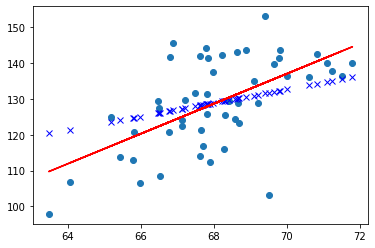

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],y)
plt.plot(x[:,0],yhatGV,'bx') # gradient, MSE=123
plt.plot(x[:,0],yhat,'r-') # matrix inverse, MSE=105.6
plt.show()

#### Python List로 gradient

gradientDescentL() 함수에는 상수항이 없는 데이터를 넣어야 한다.
상수항을 제거하고, x1으로 저장한다.

In [24]:
x1=x[:,0] # 상수항 제거

In [25]:
x1

array([65.78, 71.52, 69.4 , 68.22, 67.79, 68.7 , 69.8 , 70.01, 67.9 ,
       66.78, 66.49, 67.62, 68.3 , 67.12, 68.28, 71.09, 66.46, 68.65,
       71.23, 67.13, 67.83, 68.88, 63.48, 68.42, 67.63, 67.21, 70.84,
       67.49, 66.53, 65.44, 69.52, 65.81, 67.82, 70.6 , 71.8 , 69.21,
       66.8 , 67.66, 67.81, 64.05, 68.57, 65.18, 69.66, 67.97, 65.98,
       68.67, 66.88, 67.7 , 69.82, 69.09])

In [26]:
import random

def computeAvgError(a,b,x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a + b* x[i])) ** 2
    return totalError / float(len(x))

#x: attribute, 1d float array or list
#y: class, 1d int array
#alpha: learning rate
def gradientDescentL(x,y,alpha,iter): #list 방식으로 gradient Descent 푸는 함수
    a=random.random()
    b=random.random()
    #alpha=0.01
    n=len(x)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            aGradient += (2./n) * (((a + b * x[i])) - y[i])*(1)
            bGradient += (2./n) * (((a + b * x[i])) - y[i])*(x[i])
            #aGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-1)
            #bGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-x[i])
        a = a - (alpha * aGradient)
        b = b - (alpha * bGradient)
        if (j%100==0):
            print ("iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeAvgError(a,b,x,y)))
    return a, b

앞서 alpha와 동일하게 설정한다. alpha가 크면 하강기울기가 최적을 지나칠 수 있다는 점 유의하자.

In [27]:
a, b=gradientDescentL(x1,y,alpha,10000)

iter:0 a=0.476 b=1.776 AvgError=180.908
iter:100 a=0.476 b=1.888 AvgError=122.890
iter:200 a=0.473 b=1.888 AvgError=122.889
iter:300 a=0.471 b=1.888 AvgError=122.889
iter:400 a=0.469 b=1.888 AvgError=122.888
iter:500 a=0.467 b=1.888 AvgError=122.888
iter:600 a=0.465 b=1.888 AvgError=122.887
iter:700 a=0.462 b=1.888 AvgError=122.887
iter:800 a=0.460 b=1.888 AvgError=122.886
iter:900 a=0.458 b=1.888 AvgError=122.886
iter:1000 a=0.456 b=1.888 AvgError=122.886
iter:1100 a=0.454 b=1.888 AvgError=122.885
iter:1200 a=0.451 b=1.888 AvgError=122.885
iter:1300 a=0.449 b=1.888 AvgError=122.884
iter:1400 a=0.447 b=1.888 AvgError=122.884
iter:1500 a=0.445 b=1.888 AvgError=122.883
iter:1600 a=0.443 b=1.888 AvgError=122.883
iter:1700 a=0.440 b=1.888 AvgError=122.882
iter:1800 a=0.438 b=1.888 AvgError=122.882
iter:1900 a=0.436 b=1.888 AvgError=122.881
iter:2000 a=0.434 b=1.889 AvgError=122.881
iter:2100 a=0.432 b=1.889 AvgError=122.880
iter:2200 a=0.429 b=1.889 AvgError=122.880
iter:2300 a=0.427 b=1.8

In [28]:
a,b

(0.2578158790222259, 1.8911038338816633)

예측 값을 구해서, 그래프를 그려보자.
a, b가 앞서 모델과 차이가 있다. 이 경우 MSE오류를 비교해본다.
위 **MSE=105.6과 비교해서 약간 크게** 되었다.

In [29]:
yhatGL=b*x1+a

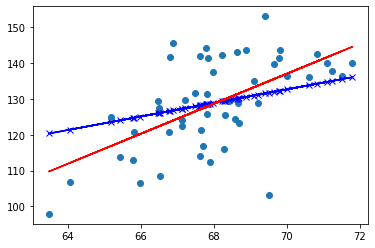

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x1,y)
plt.plot(x[:,0],yhatGL,'b-') # gradient with list, MSE=123 #xxx로 그린 아까 그래프(gradient with vector)와 비슷
plt.plot(x[:,0],yhatGV,'bx') # gradient with vector, MSE=123
plt.plot(x[:,0],yhat,'r-') # matrix inverse, MSE=105.6
plt.show()